In [ ]:
 pip install kaggle


In [ ]:
!mkdir ~/.kaggle


In [ ]:
 cp kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
! kaggle datasets download paramaggarwal/fashion-product-images-dataset

100% 23.1G/23.1G [18:31<00:00, 23.0MB/s]
100% 23.1G/23.1G [18:31<00:00, 22.3MB/s]


In [ ]:
import os
os.mkdir('dd')
!unzip '/content/fashion-product-images-dataset.zip' 'fashion-dataset/fashion-dataset/images/*' -d '/content/dd'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

path_org_csv = '/content/styles.csv'
path_reducted_csv = '/content/df_reducted.csv'
df = pd.read_csv(path_reducted_csv,on_bad_lines='skip')
df.head()

,index,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,1,39386.0,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
1,3,21379.0,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
2,12,18653.0,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,2011.0,Casual,Fila Men Cush Flex Black Slippers
3,14,46885.0,Boys,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,2012.0,Casual,Ben 10 Boys Navy Blue Slippers
4,15,12369.0,Men,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Formal,Reid & Taylor Men Check Purple Shirts


In [ ]:
df.dropna(inplace=True)
# df.drop(columns=['productDisplayName'],inplace=True)
df = df.reset_index(drop=True)
df['year'] = df['year'].astype(int)
df['id'] = df['id'].astype(int)

In [ ]:
df.drop(columns=['year'], inplace = True)
df.head()

,index,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName
0,1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,Peter England Men Party Blue Jeans
1,3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,Manchester United Men Solid Black Track Pants
2,12,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,Casual,Fila Men Cush Flex Black Slippers
3,14,46885,Boys,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,Casual,Ben 10 Boys Navy Blue Slippers
4,15,12369,Men,Apparel,Topwear,Shirts,Purple,Fall,Formal,Reid & Taylor Men Check Purple Shirts


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = nltk.corpus.stopwords.words('english')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()

for index, i in enumerate(df['productDisplayName']):
  text = i
  a = word_tokenize(text)
  a = [x for x in a if x not in stop_words]
  a_stemmed = [ps.stem(x) for x in a]
  a_final = ' '.join(a_stemmed)
  df.at[index, 'productDisplayName'] = a_final


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
base_color = 'baseColour'
gender = 'gender'
master = 'masterCategory'
sub = 'subCategory'
art = 'articleType'
usage = 'usage'
season = 'season'
text = 'productDisplayName'


In [ ]:
#Replacing for Color Base Group

df[base_color] = df[base_color].replace('Lime Green','Yellow')
df[base_color] = df[base_color].replace('Fluorescent Green','Green')
df[base_color] = df[base_color].replace('Sea Green','Green')
df[base_color] = df[base_color].replace('Coffee Brown','Brown')
df[base_color] = df[base_color].replace('Mushroom Brown','Brown')
df[base_color] = df[base_color].replace('Burgundy','Red')
df[base_color] = df[base_color].replace('Maroon','Red')
df[base_color] = df[base_color].replace('Metallic','Silver')
df[base_color] = df[base_color].replace('Teal','Blue')
df[base_color] = df[base_color].replace('Turquoise Blue','Blue')
df[base_color] = df[base_color].replace('Khaki','Grey')
df[base_color] = df[base_color].replace('Grey Melange','Grey')

In [ ]:
#Rplace (Boys , Girls) With (Men and Women) in Gender Group
df[gender] = df[gender].replace('Boys', 'Men')
df[gender] = df[gender].replace('Girls', 'Women')


In [ ]:
# Delete 'Home' and 'Sporting Goods' in Master Categury
df = df[(df[master] !='Home') & (df[master] != 'Sporting Goods')]
df[master].value_counts()

Apparel          9030
Footwear         4818
Accessories      2448
Personal Care    2139
Free Items        105
Name: masterCategory, dtype: int64

In [ ]:
#Delete Classes in Master Categury where Class_count < 20
sub_class = df[sub].value_counts()
for i,item in enumerate(sub_class):
  if (item< 20):
    df = df[df[sub] != sub_class.index[i]]



In [ ]:
##Delete Classes in articleType where Class_count < 20

art_class = df[art].value_counts()
print('Class_count Before Delete :',len(art_class))
for i,item in enumerate(art_class):
  if (item< 20):
    df = df[df[art] != art_class.index[i]]

art_class = df[art].value_counts()

print('Class_count After Delete :',len(art_class))


Class_count Before Delete : 121
Class_count After Delete : 70


In [ ]:
#Delete Party and travel Classes and Combine 'Smart Casual' and 'Casual' Class
usage_class = df[usage].value_counts()
df = df[(df[usage] != 'Party') & (df[usage] !='Travel')]
df[usage] = df[usage].replace('Smart Casual', 'Casual')
df[usage].value_counts()

Casual    10901
Sports     3491
Formal     1994
Ethnic     1664
Name: usage, dtype: int64

In [ ]:
def add_jpg(id):
  return str(id)+'.jpg'

df['image'] = df['id'].apply(add_jpg)
df

,index,id,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,image
0,1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,peter england men parti blue jean,39386.jpg
1,3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,manchest unit men solid black track pant,21379.jpg
2,12,18653,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,Casual,fila men cush flex black slipper,18653.jpg
3,14,46885,Men,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,Casual,ben 10 boy navi blue slipper,46885.jpg
4,15,12369,Men,Apparel,Topwear,Shirts,Purple,Fall,Formal,reid & taylor men check purpl shirt,12369.jpg
...,...,...,...,...,...,...,...,...,...,...,...
18561,44063,38479,Men,Apparel,Topwear,Tshirts,Green,Summer,Casual,gini joni boy core green t-shirt,38479.jpg
18562,44065,1644,Men,Apparel,Topwear,Tshirts,Red,Fall,Sports,kipsta men loos fit round neck jersey red,1644.jpg
18563,44069,55283,Women,Personal Care,Makeup,Highlighter and Blush,Pink,Spring,Casual,lakm absolut cheek chromat day blush blusher,55283.jpg
18564,44073,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,Casual,lotto men 's soccer track flip flop,6461.jpg


In [ ]:
delete_list = ['39403.jpg','39410.jpg','39401.jpg','39425.jpg','12347.jpg']
df = df[~df['image'].isin(delete_list)]
df.drop(columns=['id'],inplace=True)
df = df.reset_index(drop=True)

<ipython-input-169-abeba7997b77>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['id'],inplace=True)


In [ ]:
def class_count(group):
  return len(group.value_counts())

class_count(df[art])

70

In [ ]:
cols = df.columns[1:]

In [ ]:
cols

Index(['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage', 'productDisplayName', 'image'],
      dtype='object')

In [ ]:
#Create Csv for train and test gender
def add_image_path(num):
  images = '/content/fashion-product-images-dataset/fashion-dataset/images'
  images_extracted = '/content/dd/fashion-dataset/fashion-dataset/images'
  string = images_extracted + f'/{num}'
  return string

def fix_image_path(cols):
  gender_df = df[cols].copy()
  gender_df['image'] = gender_df['image'].apply(add_image_path)
  return gender_df


target_df = fix_image_path(cols)
print(target_df['image'][0])
target_df.head()

/content/dd/fashion-dataset/fashion-dataset/images/39386.jpg


,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,image
0,Men,Apparel,Bottomwear,Jeans,Blue,Summer,Casual,peter england men parti blue jean,/content/dd/fashion-dataset/fashion-dataset/im...
1,Men,Apparel,Bottomwear,Track Pants,Black,Fall,Casual,manchest unit men solid black track pant,/content/dd/fashion-dataset/fashion-dataset/im...
2,Men,Footwear,Flip Flops,Flip Flops,Black,Fall,Casual,fila men cush flex black slipper,/content/dd/fashion-dataset/fashion-dataset/im...
3,Men,Footwear,Flip Flops,Flip Flops,Navy Blue,Fall,Casual,ben 10 boy navi blue slipper,/content/dd/fashion-dataset/fashion-dataset/im...
4,Men,Apparel,Topwear,Shirts,Purple,Fall,Formal,reid & taylor men check purpl shirt,/content/dd/fashion-dataset/fashion-dataset/im...


In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder

gender_encoder = LabelEncoder()
target_df[gender] = gender_encoder.fit_transform(target_df[gender])


master_encoder = LabelEncoder()
target_df[master] = master_encoder.fit_transform(target_df[master])


sub_encoder = LabelEncoder()
target_df[sub] = sub_encoder.fit_transform(target_df[sub])


art_encoder = LabelEncoder()
target_df[art] = art_encoder.fit_transform(target_df[art])


color_encoder = LabelEncoder()
target_df[base_color] = color_encoder.fit_transform(target_df[base_color])


usage_encoder = LabelEncoder()
target_df[usage] = usage_encoder.fit_transform(target_df[usage])

season_encoder = LabelEncoder()
target_df[season] = season_encoder.fit_transform(target_df[season])




In [ ]:
print('Labels are :',gender_encoder.classes_)
print('Encoded are :',gender_encoder.transform(gender_encoder.classes_))

Labels are : ['Men' 'Unisex' 'Women']
Encoded are : [0 1 2]


In [ ]:
val_count = round(0.1 * len(target_df))
print(val_count)

test_count = round(0.1 * len(target_df))
print(test_count)

1805
1805


In [ ]:
target_val_df = target_df[0:val_count]
target_test_df = target_df[val_count:val_count+test_count]



In [ ]:
target_df = target_df[val_count+test_count:]

In [ ]:
target_val_df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,image
0,0,1,4,29,2,2,0,peter england men parti blue jean,/content/dd/fashion-dataset/fashion-dataset/im...
1,0,1,4,63,1,0,0,manchest unit men solid black track pant,/content/dd/fashion-dataset/fashion-dataset/im...
2,0,2,9,19,1,0,0,fila men cush flex black slipper,/content/dd/fashion-dataset/fashion-dataset/im...
3,0,2,9,19,16,0,0,ben 10 boy navi blue slipper,/content/dd/fashion-dataset/fashion-dataset/im...
4,0,1,27,51,23,0,2,reid & taylor men check purpl shirt,/content/dd/fashion-dataset/fashion-dataset/im...


In [ ]:
target_df = target_df.reset_index()
target_test_df = target_test_df.reset_index()
target_val_df = target_val_df.reset_index()

In [ ]:

target_df = target_df.drop(columns=['index'])
target_test_df = target_test_df.drop(columns=['index'])
target_val_df = target_val_df.drop(columns=['index'])

In [ ]:
def load_samples(df,col1,col2,col3,col4,col5,col6,col7,col8,col9):
  df = df[[col1,col2,col3,col4,col5,col6,col7,col8,col9]]
  sample = []
  for i in range(len(df)):
    sample.append([df[col1][i],df[col2][i],df[col3][i],df[col4][i],df[col5][i],df[col6][i],df[col7][i],df[col8][i],df[col9][i]])
  return sample


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))
vectorizer.fit(df['productDisplayName'])

TfidfVectorizer(ngram_range=(1, 2))

In [ ]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle
from tensorflow.keras.applications.resnet50 import preprocess_input

import cv2
# ...
label_name = [gender,master,sub,art,base_color,season,usage]
class_counts = []

for i in label_name:
  class_counts.append(len(target_df[i].value_counts()))

def img_preprocess(img, labels):
    img = cv2.resize(img, (224, 224))
    norm_img = np.zeros((224, 224))
    img_normal = cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)
    final_img = preprocess_input(img_normal)

    label_tensors = []

    for i,label in enumerate(labels):
        label_tensor = to_categorical(label, num_classes=class_counts[i])
        label_tensors.append(label_tensor)

    return final_img, label_tensors



def text_preprocess(text):
  vectorized_text = vectorizer.transform([text])
  x = vectorized_text.toarray()

  return np.array(x)




def custom_data_generator(samples, batch_size, shuffle_data=True, resize=224):
    num_sample = len(samples)
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )

    while True:
        if shuffle_data:
            samples = shuffle(samples)

        for offset in range(0, num_sample, batch_size):
            batch_samples = samples[offset:offset + batch_size]

            x_train = []
            x_train_text = []

            train_gender = []
            train_art = []
            train_season = []
            train_usage = []
            train_master = []
            train_color = []
            train_sub = []

            for i,batch_sample in enumerate(batch_samples):
                img_name = batch_sample[0]
                labels = batch_sample[1:-1]
                text = batch_sample[-1]
                text_final = text_preprocess(text)
                img = cv2.imread(img_name)
                img, label_tensors = img_preprocess(img, labels)


                train_gender.append(label_tensors[0])
                train_master.append(label_tensors[1])
                train_sub.append(label_tensors[2])
                train_art.append(label_tensors[3])
                train_color.append(label_tensors[4])
                train_season.append(label_tensors[5])
                train_usage.append(label_tensors[6])

                img = datagen.random_transform(img)

                x_train.append(img)
                x_train_text.append(np.array(text_final))

            X_train = np.array(x_train)
            yield {'image_input':X_train ,
                   'text_input':np.array(x_train_text)},{'gender_output':np.array(train_gender),
                                                'master_output':np.array(train_master),
                                                'sub_output':np.array(train_sub),
                                                'art_output':np.array(train_art),
                                                'color_output':np.array(train_color),
                                                'season_output':np.array(train_season),
                                                'usage_output':np.array(train_usage)}


In [ ]:
target_df['masterCategory']

0        0
1        2
2        1
3        1
4        1
        ..
14434    1
14435    1
14436    4
14437    2
14438    4
Name: masterCategory, Length: 14439, dtype: int64

In [ ]:
train = load_samples(target_df,'image',gender,master,sub,art,base_color,season,usage,text)
val = load_samples(target_val_df,'image',gender,master,sub,art,base_color,season,usage,text)
test = load_samples(target_test_df,'image',gender,master,sub,art,base_color,season,usage,text)

In [ ]:
target_df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,image
0,0,0,24,54,32,2,3,fila men white sock,/content/dd/fashion-dataset/fashion-dataset/im...
1,1,2,21,56,1,0,3,puma unisex axi black sport shoe,/content/dd/fashion-dataset/fashion-dataset/im...
2,0,1,13,66,10,2,0,levi men jazz stripe grey trunk,/content/dd/fashion-dataset/fashion-dataset/im...
3,2,1,1,32,1,0,1,ayaani women black patiala kurta set,/content/dd/fashion-dataset/fashion-dataset/im...
4,0,1,27,67,1,2,0,unit color benetton kid boy black print t-shirt,/content/dd/fashion-dataset/fashion-dataset/im...


In [ ]:
train_size = len(train)
val_size = len(val)
test_size = len(test)
batch_size = 128
train_generator = custom_data_generator(train,batch_size=batch_size)
val_generator = custom_data_generator(val,batch_size=batch_size)

In [ ]:
test_generator = custom_data_generator(test,batch_size=batch_size)

In [ ]:
x,y = next(train_generator)


In [ ]:
(x['text_input'].shape)

(128, 1, 23043)

In [ ]:
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten_4')>

In [ ]:
# art_encoder.inverse_transform([np.argmax([y[1][3]])])
sub_encoder.inverse_transform([np.argmax(y['sub_output'][1])])


array(['Bags'], dtype=object)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten,Conv2D, MaxPooling2D,BatchNormalization, Dropout,Input,Activation,LSTM,Concatenate
from tensorflow.keras.applications import ResNet50,VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model




In [ ]:
def make_layer(x_inp , output , name):
  x = Dense(256, activation = 'relu')(x_inp)
  x = Dense(128, activation = 'relu')(x)
  x = Dense(output)(x)
  x = Activation('softmax' , name=name+'_output')(x)
  return x

In [ ]:
input_size_text = (1, 23043)
input_layer_text = Input(shape=input_size_text, name='text_input')
lstm = LSTM(256, activation='relu')(input_layer_text)
text_dense = Dense(128)(lstm)


In [ ]:


input_size_img=(224,224,3)
vgg_model = ResNet50(include_top=False , weights='imagenet', input_shape=input_size_img)
vgg_model.trainable = False

input_layer_img = Input(shape=input_size_img, name='image_input')
x  = vgg_model(input_layer_img, training=False)
x = Flatten()(x)
x_final = Dense(512, activation='relu')(x)





94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
#gender_out, master, sub,art, color, season, usage
img_model = Model(inputs=[input_layer_img], outputs = [x_final])
text_model = Model(inputs=input_layer_text, outputs=text_dense)




In [ ]:
combined_model = Concatenate()([img_model.output,text_model.output])
gender_out = make_layer(combined_model, class_count(target_df[gender]), 'gender')
master = make_layer(combined_model, class_count(target_df[master]), 'master')
sub = make_layer(combined_model, class_count(target_df[sub]), 'sub')
art = make_layer(combined_model, class_count(target_df[art]), 'art')
color = make_layer(combined_model, class_count(target_df[base_color]), 'color')
season =make_layer(combined_model, class_count(target_df[season]), 'season')
usage = make_layer(combined_model, class_count(target_df[usage]), 'usage')

In [ ]:
final_model = Model(inputs=[img_model.input,text_model.input], outputs=[gender_out,master,sub,art,color,season,usage])

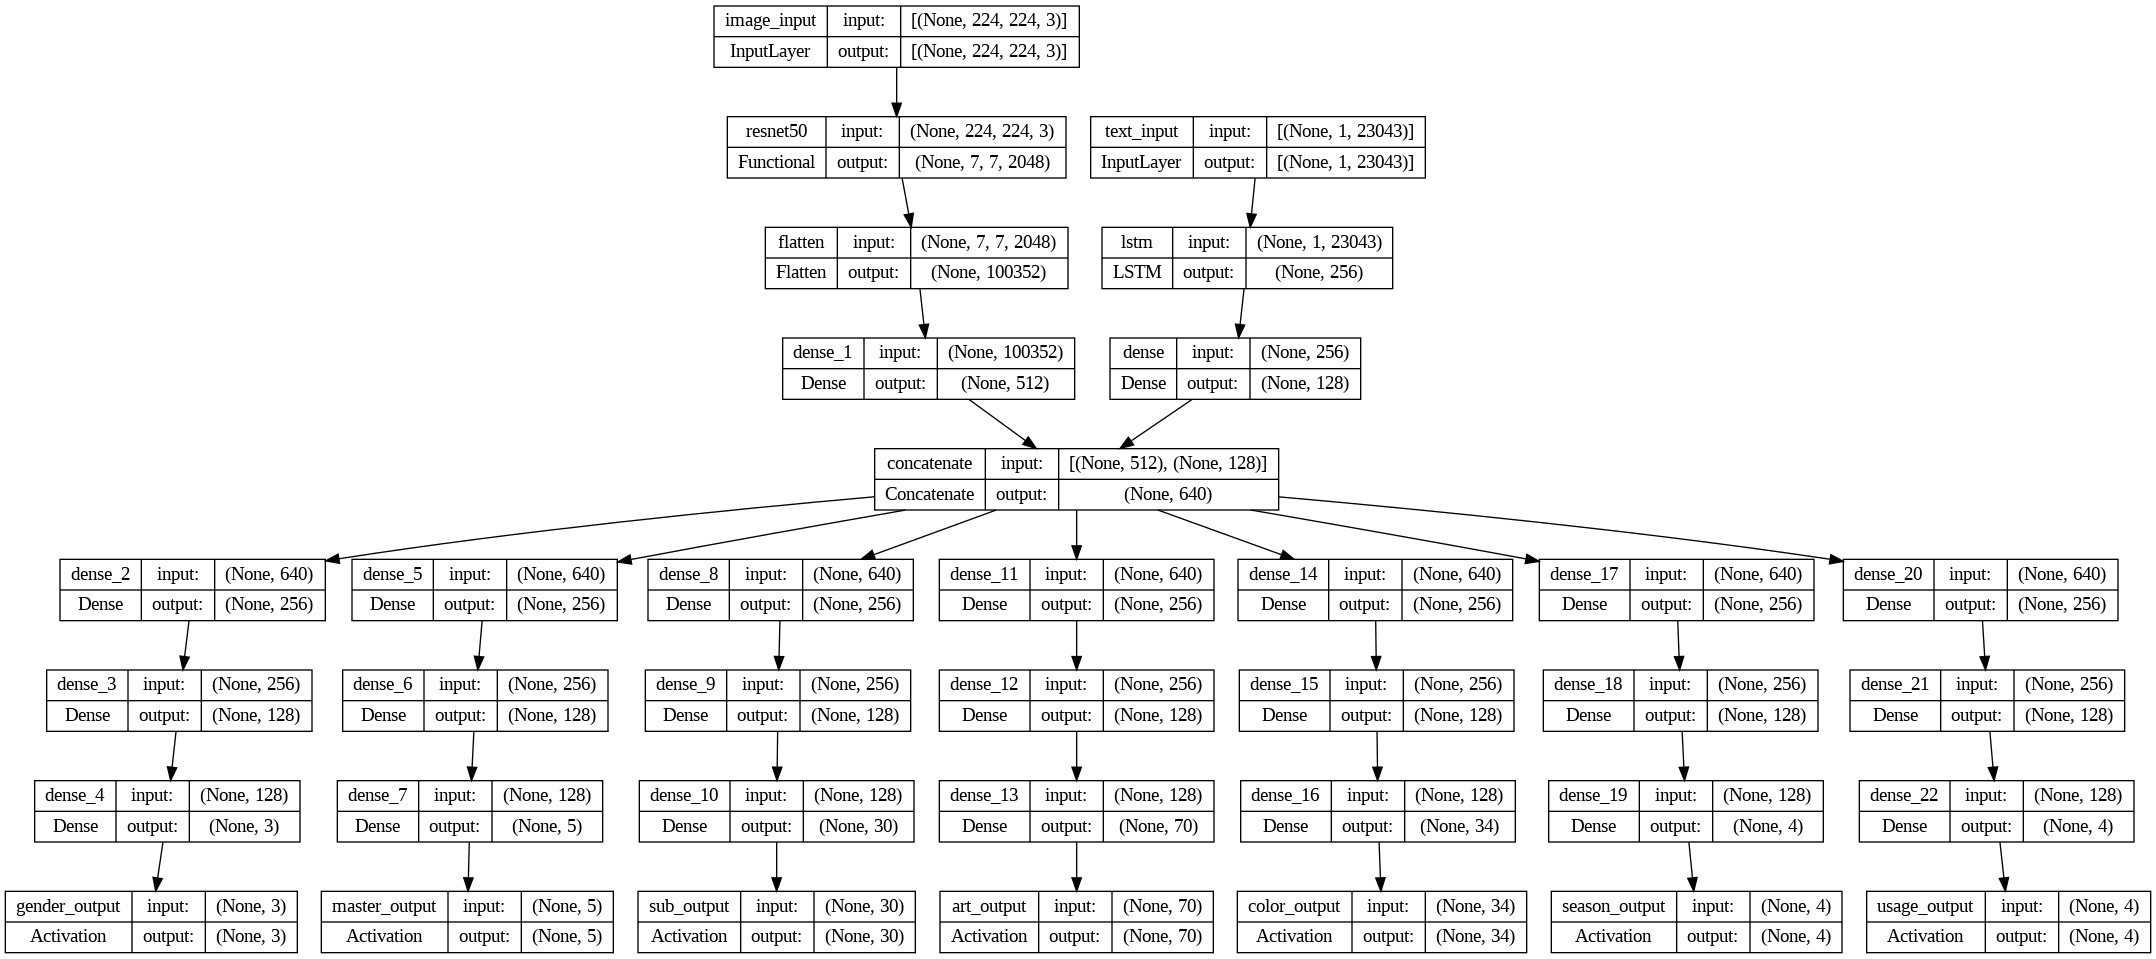

In [ ]:
plot_model(final_model, show_shapes=True)

In [ ]:
losses = {
    'gender_output': 'categorical_crossentropy',
    'master_output': 'categorical_crossentropy',
    'sub_output': 'categorical_crossentropy',
    'art_output': 'categorical_crossentropy',
    'color_output': 'categorical_crossentropy',
    'season_output': 'categorical_crossentropy',
    'usage_output': 'categorical_crossentropy'
}

final_model.compile(optimizer=Adam(), loss=losses, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler

path = '/content/drive/MyDrive/model_mhc/final_model_mch.h5'

checkpoint = ModelCheckpoint(filepath=path, save_weights_only=True, verbose=1,
                             save_best_only=False, mode='auto', save_freq='epoch')

def scheduler(epoch, lr):
  # if epoch ==1 or epoch ==0:
  #   new_lr = lr *0.5
  # else:
  #   new_lr = lr
  new_lr = 0.0002500000118743628
  return new_lr

lr_sch = LearningRateScheduler(scheduler, verbose=1)




In [ ]:
hist = final_model.fit(
    train_generator,
    steps_per_epoch = train_size//batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps = val_size//batch_size,
    callbacks = [checkpoint,lr_sch]
)


Epoch 1: LearningRateScheduler setting learning rate to 0.0002500000118743628.
Epoch 1/10
112/112 [==============================] - ETA: 0s - loss: 0.3128 - gender_output_loss: 0.0016 - master_output_loss: 0.0027 - sub_output_loss: 0.0089 - art_output_loss: 0.0311 - color_output_loss: 0.1100 - season_output_loss: 0.1372 - usage_output_loss: 0.0213 - gender_output_accuracy: 0.9997 - master_output_accuracy: 0.9992 - sub_output_accuracy: 0.9970 - art_output_accuracy: 0.9905 - color_output_accuracy: 0.9720 - season_output_accuracy: 0.9514 - usage_output_accuracy: 0.9914
Epoch 1: saving model to /content/drive/MyDrive/model_mhc/final_model_mch.h5
112/112 [==============================] - 827s 7s/step - loss: 0.3128 - gender_output_loss: 0.0016 - master_output_loss: 0.0027 - sub_output_loss: 0.0089 - art_output_loss: 0.0311 - color_output_loss: 0.1100 - season_output_loss: 0.1372 - usage_output_loss: 0.0213 - gender_output_accuracy: 0.9997 - master_output_accuracy: 0.9992 - sub_output_acc

KeyboardInterrupt: ignored

In [ ]:
final_model.save('final_model_ep12.h5')
!cp '/content/final_model_ep12.h5' '/content/drive/MyDrive/model_mhc'

<Axes: >

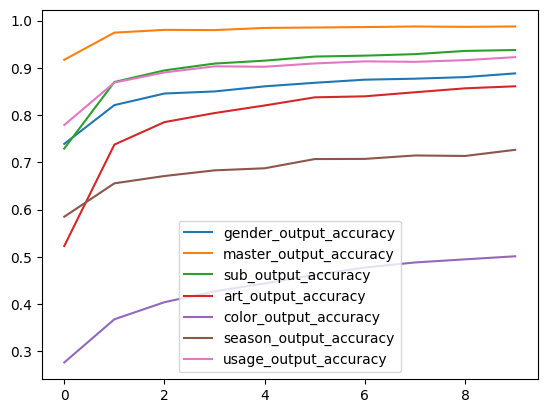

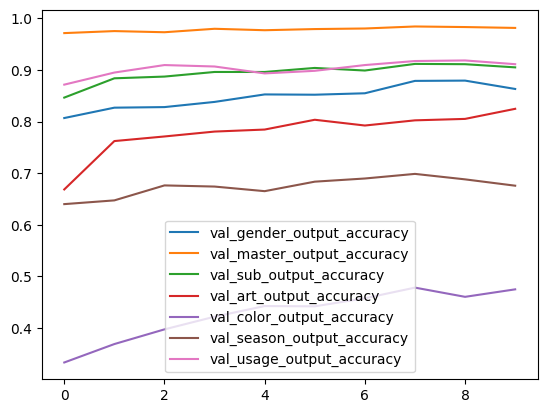

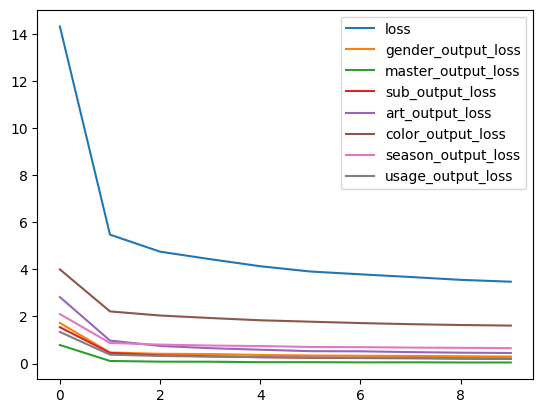

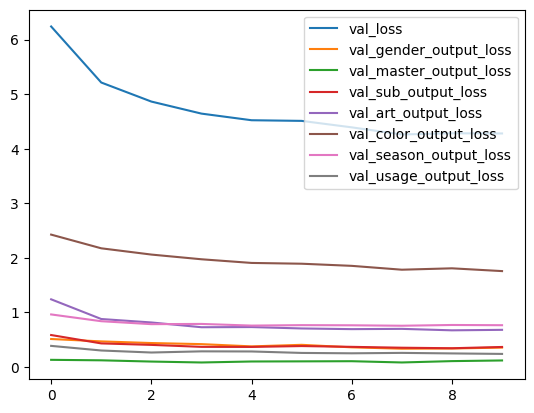

In [ ]:
h_df = pd.DataFrame(hist.history)
h_df.loc[:,[col for col in h_df.columns if 'accuracy' in col and 'val' not in col]].plot()
h_df.loc[:,[col for col in h_df.columns if 'accuracy' in col and 'val' in col]].plot()
h_df.loc[:,[col for col in h_df.columns if 'loss' in col and 'val' not in col]].plot()
h_df.loc[:,[col for col in h_df.columns if 'loss' in col and 'val' in col]].plot()

In [ ]:

grups = ['gender_output','master_output','sub_output','art_output','color_output','season_output','usage_output']
steps = test_size // batch_size

p_gender =[]
p_master =[]
p_sub = []
p_art =[]
p_color = []
p_season =[]
p_usage =[]


t_gender =[]
t_master =[]
t_sub = []
t_art =[]
t_color = []
t_season =[]
t_usage =[]


for i in range(steps):
  print(f'step:{i}')
  xtest,xtrue = next(test_gen)
  y_predicted = final_model.predict(xtest)
  for k,item in enumerate(grups):
    print(f'item is :{item} and k :{k}')

    for j in range(batch_size):
      print(f'y_predicted[{k}][{j}]')
      predicted = np.argmax(y_predicted[k][j])
      true_label = np.argmax(xtrue[item][j])
      if k==0:
        p_gender.append(predicted)
        t_gender.append(true_label)
      if k==1:
        p_master.append(predicted)
        t_master.append(true_label)
      if k==2:
        p_sub.append(predicted)
        t_sub.append(true_label)
      if k==3:
        p_art.append(predicted)
        t_art.append(true_label)
      if k==4:
        p_color.append(predicted)
        t_color.append(true_label)
      if k==5:
        p_season.append(predicted)
        t_season.append(true_label)
      if k==6:
        p_usage.append(predicted)
        t_usage.append(true_label)


In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score

predicted_classes = [p_gender,p_master ,p_sub ,p_art ,p_color, p_season, p_usage]
true_classes = [t_gender,t_master,t_sub ,t_art,t_color,t_season,t_usage]

from sklearn.metrics import classification_report
cm_list = []
for i in range(len(predicted_classes)):
  print(grups[i], 'report :')
  report = classification_report(true_classes[i], predicted_classes[i])
  cm_list.append(confusion_matrix(true_classes[i], predicted_classes[i]))
  print(report,'\n')

gender_output report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       909
           1       0.97      0.97      0.97       217
           2       0.99      0.99      0.99       666

    accuracy                           0.99      1792
   macro avg       0.98      0.98      0.98      1792
weighted avg       0.99      0.99      0.99      1792
 

master_output report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       256
           1       1.00      0.99      1.00       886
           2       1.00      1.00      1.00       463
           3       0.50      0.50      0.50         8
           4       0.97      1.00      0.99       179

    accuracy                           0.99      1792
   macro avg       0.89      0.89      0.89      1792
weighted avg       0.99      0.99      0.99      1792
 

sub_output report :
              precision    recall  f1-score   support

     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score

cm = confusion_matrix(y_true, y_predict)

recall = recall_score(y_true, y_predict,average='micro')

f1 = f1_score(y_true, y_predict,average='micro')

print("confiusn matrix")
print(cm)
print("Recall:", recall)
print("F1 Score:", f1)
print('Loss:',loss)
print('accuracy',acc)

confiusn matrix
[[  6   0   1 ...   0   0   0]
 [  0   8   0 ...   0   0   0]
 [  0   0  71 ...   0   2   0]
 ...
 [  0   0   0 ... 232   0   0]
 [  0   0   0 ...   0   3   0]
 [  0   0   0 ...   0   0  18]]
Recall: 0.9173177083333334
F1 Score: 0.9173177083333335
Loss: 0.284758061170578
accuracy 0.931080162525177


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true, y_predict)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      0.89      0.94         9
           2       0.96      0.90      0.93        79
           3       1.00      1.00      1.00        12
           4       0.92      0.96      0.94       229
           5       1.00      0.33      0.50         3
           6       0.90      0.71      0.79        38
           7       0.67      1.00      0.80         2
           8       0.93      1.00      0.96        13
           9       0.89      0.91      0.90        77
          10       0.94      1.00      0.97        83
          11       0.17      0.12      0.14         8
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00        11
          15       0.85      0.95      0.90       156
          16       0.92      1.00      0.96        11
          17       0.97    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
